<a href="https://colab.research.google.com/github/SergeyMitrofanov88/_Hydro_Practical_works/blob/addition-brannch/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5_%D0%9B%D1%8F%D1%85%D0%BE%D0%B2_%D0%9C_%D0%9C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Источники**

**Учебное пособие:** https://www.researchgate.net/publication/364305910_OSNOVY_RASCETOV_GIDROENERGETICESKIH_REZIMOV_GES_V_ENERGOSISTEME_BASIS_OF_CALCULATION_OF_HYDROPOWER_MODES_OF_HPP_IN_THE_POWER_SYSTEM

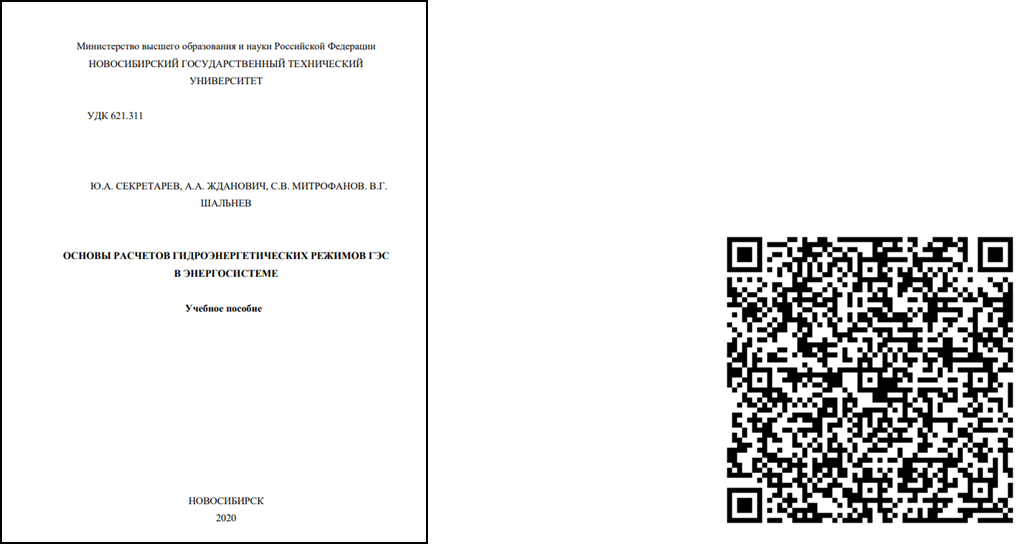

**Учебно-методический курс:**

https://dispace.edu.nstu.ru/didesk/course/show/10047

# ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОЙ ГЛУБИНЫ СРАБОТКИ ВОДОХРАНИЛИЩА И ЕГО ПОЛЕЗНОГО ОБЪЕМА

##Основные положения методики расчета оптимальной глубины сработки водохранилища годового регулирования

Выработку ГЭС при наличии водохранилища можно представить состоящей из двух частей: выработки электроэнергии за счет бытового стока реки Эбыт, протекающего во время сработки водохранилища, и выработки за счет сработки водохранилища Эвдхр

Таким образом, можно построить следующие логические цепочки:

⦁	со стороны бытового стока:


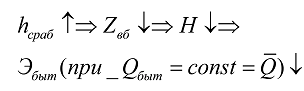

⦁	со стороны стока из водохранилища:

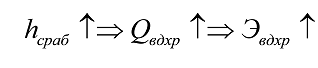

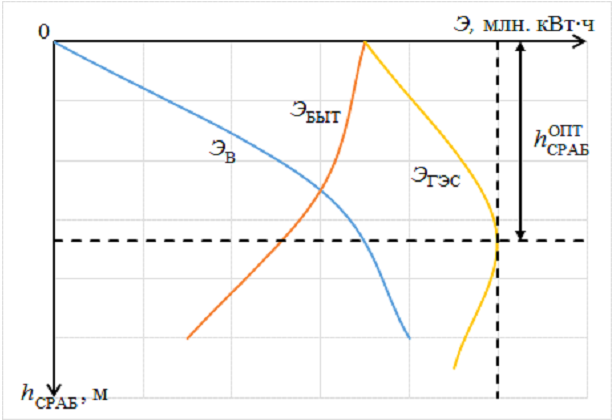

График зависимости энергии от глубины сработки водохранилища


Суммируя для различных глубин сработки энергию водохранилища и транзитную энергию, мы получим полную величину энергии ГЭС за весь период сработки водохранилища. Очевидно, что для данных гидрологических условий и для принятого режима регулирования та глубина сработки водохранилища, при которой ГЭС вырабатывает наибольшее количество энергии, оказывается наиболее выгодной.
Дальнейшее углубление сработки водохранилища, хотя и увеличило бы его полезный объем и регулируемый расход, используемый ГЭС, но при этом напор уменьшился бы настолько, что полное количество энергии, вырабатываемой ГЭС, не увеличилось бы, а уменьшилось.


## Пример расчета оптимальной глубины сработки водохранилища

1. В течение всего периода сработки водохранилища величина бытового расхода рассчитывается как среднее значение расхода воды за весь период сработки:


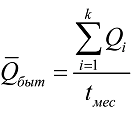

где   – средний расход на месячном интервале (м3/с), взятый из гидрографа;     – период сработки, месяцев, количество месяцев сработки;


2. Период сработки водохранилища рассчитывается в соответствии с рис.4.1 и в расчетах используется его значение, полученное в секундах.
3. Так как период сработки водохранилища достаточно велик, то для расчета среднего за период напора Hгэс используем среднюю отметку верхнего бьефа, вычисленную как

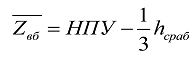

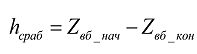

где  ,   – начальная и конечная отметки верхнего бьефа
(рис. 4.4).

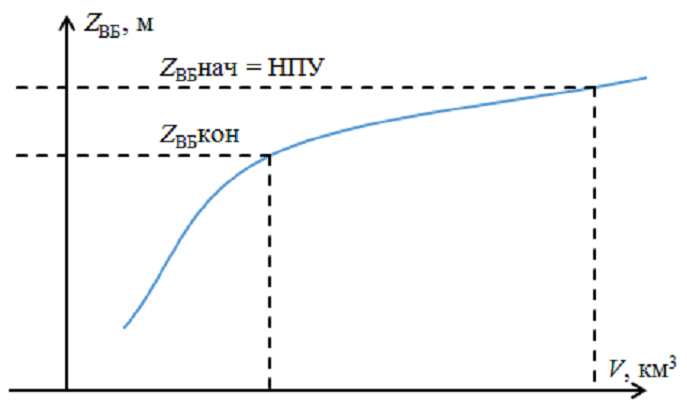

Рис.1 Зависимость верхнего бьефа от его объема

В качестве критерия, используемого для получения оптимальной величины сработки водохранилища, выбирается критерий максимизации выработки электроэнергии за весь период сработки.


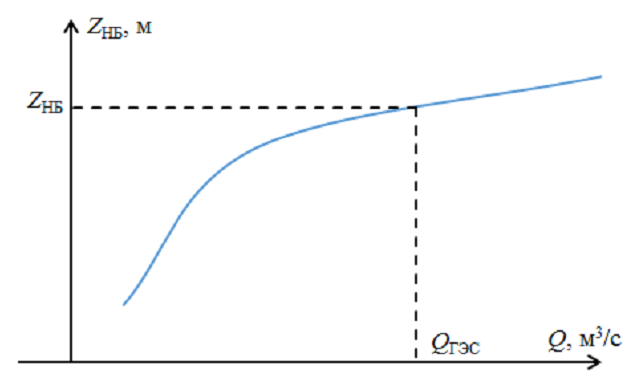

Рис.2 Зависимость уровня нижнего бьефа от расхода через ГЭС

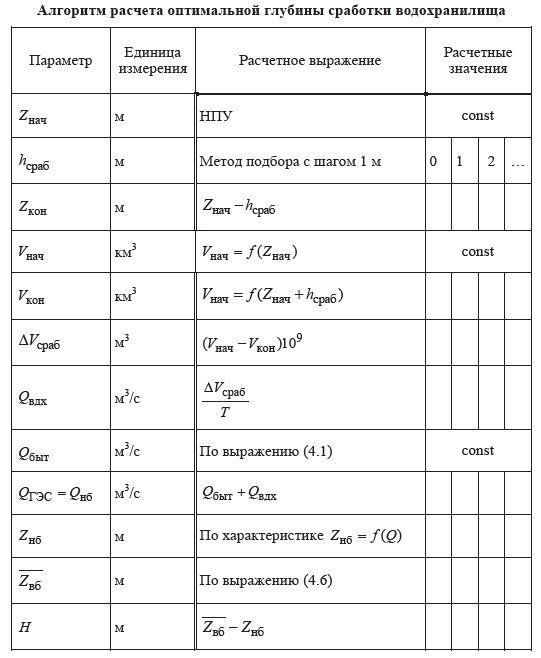

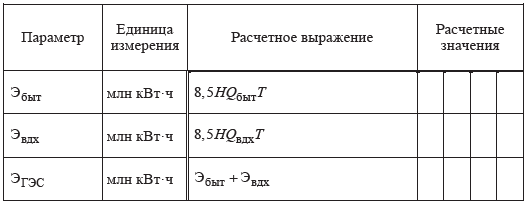

##**Решение**

Построение полиномов кривых верхнего и нижнего бьефа

**Вариант 4**

Уравнение полинома для Q, м3/с:
           3             2
1.169e-10 x - 1.146e-06 x + 0.004825 x + 80.72
Уравнение полинома для V, км3:
          2
-0.01724 x + 0.9651 x + 89.07


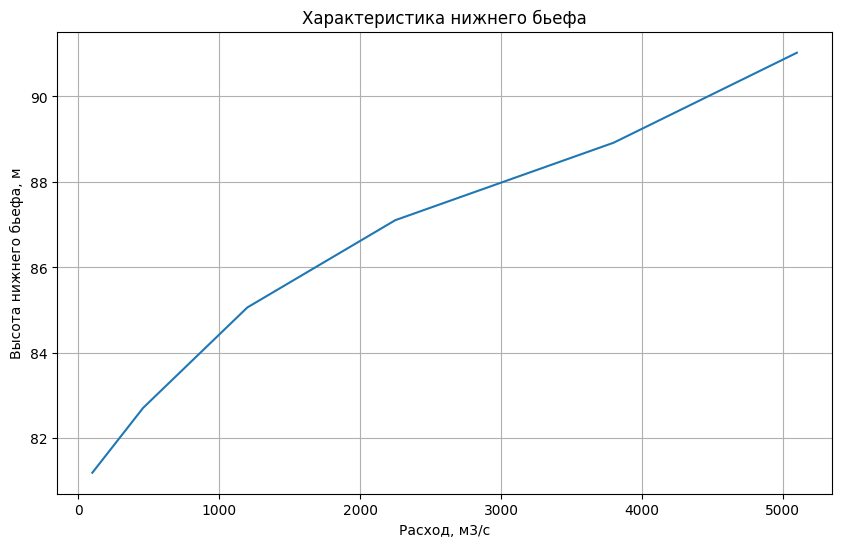

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Вариант 4
data = {
    "Zнб, м": [81, 83, 85, 87, 89, 91],
    "Qнб, м3/c": [100, 460, 1200, 2250, 3800, 5100],
    "Zвб, м": [87, 91, 95, 99, 101, 103],
    "V, км3": [0.1, 0.9, 4.6, 14.6, 21, 29.3],
    "Qgid, м3/с": [480, 1000, 880, 1280, 1520, 1800]
}
NPU = 102

df = pd.DataFrame(data)
df.name = "Исходные данные"

X = np.array(df["Qнб, м3/c"])
Y = np.array(df["Zнб, м"])

poly_fit_X = np.polyfit(X, Y, 3)
poly_X = np.poly1d(poly_fit_X)

print("Уравнение полинома для Q, м3/с:")
print(poly_X)

X2 = np.array(df["V, км3"])
Y2 = np.array(df["Zвб, м"])

poly_fit_X2 = np.polyfit(X2, Y2, 2)
poly_X2 = np.poly1d(poly_fit_X2)

print("Уравнение полинома для V, км3:")
print(poly_X2)

#Графики
plt.figure(figsize=(10, 6))
plt.plot(X, poly_X(X))

plt.xlabel('Расход, м3/с')
plt.ylabel('Высота нижнего бьефа, м')
plt.title('Характеристика нижнего бьефа')
plt.grid(True)
plt.show()


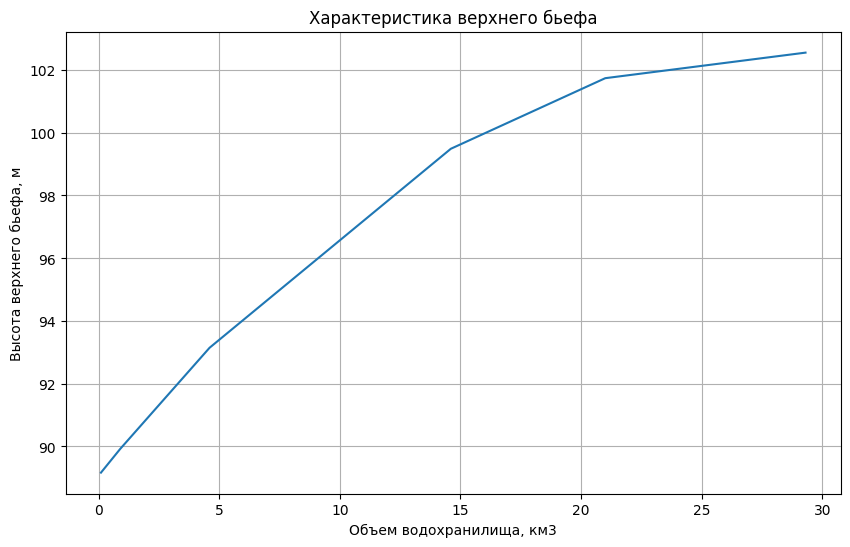

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X2, poly_X2(X2))

plt.xlabel('Объем водохранилища, км3')
plt.ylabel('Высота верхнего бьефа, м')
plt.title('Характеристика верхнего бьефа')
plt.grid(True)
plt.show()

Расчёт изменений объема водохранилища

In [ ]:
poly_fit_X3 = np.polyfit(Y2, X2, 2)
poly_X3 = np.poly1d(poly_fit_X3)
Vmin = poly_X3(NPU)
#Vmin - начальный объем водохранилища
hsrab = np.arange(0, 20, 0.1)
#hsrab - оптимальная глубина сработки
Vkon = poly_X3(NPU - hsrab)
#Vkon - конечный объем водохранилища для глубины сработки
dV = (Vmin - Vkon) * (10 ** 9)
#dV - сработанный объем водохранилища

Расчёт бытового расхода и расхода через водохранилище

In [ ]:
Qbit11 = np.mean(df["Qgid, м3/с"])
#Qbit - величина бытового расхода
T = 6*30*24*60*60
#6 месяцев Т - время сработки в часах
Qvdh = dV / T
#Qvdh - расход водохранилища
Qges = Qvdh + Qbit11
#Qges - расход ГЭС
Qbit11

1160.0

Расчёт отметок бьефов и напора

In [ ]:
Znb = poly_X(Qges)
H = (NPU - hsrab / 3) - Znb

Расчёт энергий

In [ ]:
Ebit = 8.5*Qbit11*H*6*30*24/(10 ** 6)
Evdh = 8.5*Qvdh*H*6*30*24/(10 ** 6)
Eges = Ebit + Evdh

Построенение графиков

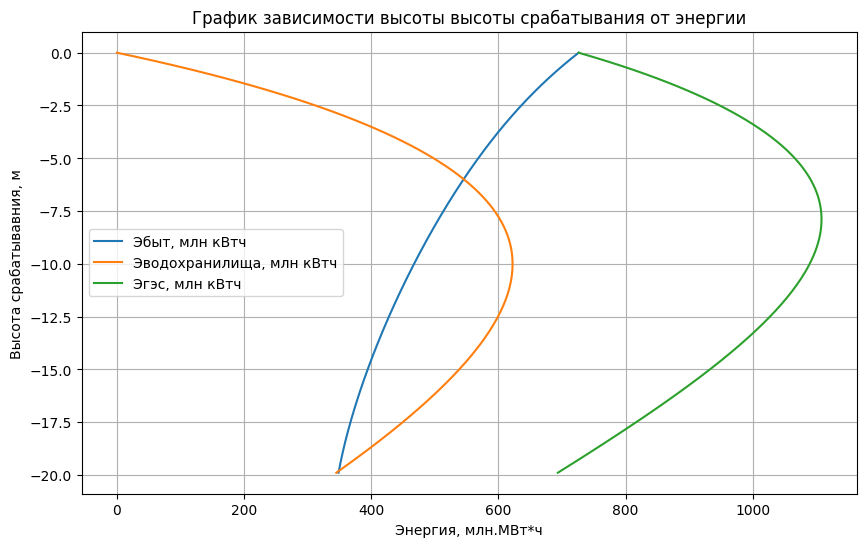

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Ebit, -hsrab, label='Эбыт, млн кВтч')
plt.plot(Evdh, -hsrab, label='Эводохранилища, млн кВтч')
plt.plot(Eges, -hsrab, label='Эгэс, млн кВтч')

plt.xlabel('Энергия, млн.МВт*ч')
plt.ylabel('Высота срабатывавния, м')
plt.title('График зависимости высоты высоты срабатывания от энергии')
plt.legend()

plt.grid(True)
plt.show()


In [ ]:
# Из таблицы ниже выбираем значение энергии по условию Эi > Эi+1
new_data1 = {
    "Э гэс, млн. кВтч": Eges,
    "hср, м": hsrab
}
new_df1 = pd.DataFrame(new_data1)
new_df1
# Получившееся значение - 1108.0237

,"Э гэс, млн. кВтч","hср, м"
0,726.040870,0.0
1,737.449177,0.1
2,748.616943,0.2
3,759.548726,0.3
4,770.248934,0.4
...,...,...
195,714.523134,19.5
196,709.254375,19.6
197,703.974031,19.7
198,698.682442,19.8


In [ ]:
X4 = hsrab
Y4 = Eges

poly_fit_X4 = np.polyfit(Y4, X4, 5)
poly_X4 = np.poly1d(poly_fit_X4)
hsropt = poly_X4(1108.0237)
print("Оптимальная высота сработки:")
print(hsropt)
#hsropt - оптимальная высота сработки
UMO = NPU - hsropt
Vumo = poly_X3(UMO)
Vpol = Vmin - Vumo
Proc = (Vpol / Vmin)*100
print("Процент использования водохранилища:")
print(Proc)
#Proc - процент использования водохранилища

Оптимальная высота сработки:
7.759700740125481
Процент использования водохранилища:
85.13321500712013


Итоговая таблица

In [ ]:
end_data = {
    "hср, м": hsrab,
    "Vнач, м3": Vmin,
    "Vкон, м3": Vkon,
    "dV, м3": dV,
    "Qводохранилища, м3/c": Qvdh,
    "Qбыт, м3/c": Qbit11,
    "Qгэс, м3/c": Qges,
    "Zнижнего бьефа, м": Znb,
    "Напор, м": H,
    "Эводохранилища, млн. кВтч": Evdh,
    "Эбыт, млн. кВтч": Ebit,
    "Эгэс, млн. кВтч": Eges,
}
new_df2 = pd.DataFrame(end_data)
new_df2

,"hср, м","Vнач, м3","Vкон, м3","dV, м3","Qводохранилища, м3/c","Qбыт, м3/c","Qгэс, м3/c","Zнижнего бьефа, м","Напор, м","Эводохранилища, млн. кВтч","Эбыт, млн. кВтч","Эгэс, млн. кВтч"
0,0.0,24.996341,24.996341,0.000000e+00,0.000000,1160.0,1160.000000,84.954867,17.045133,0.000000,726.040870,726.040870
1,0.1,24.996341,24.605689,3.906514e+08,25.119043,1160.0,1185.119043,85.020657,16.946010,15.630512,721.818665,737.449177
2,0.2,24.996341,24.218077,7.782631e+08,50.042639,1160.0,1210.042639,85.085025,16.848308,30.959874,717.657070,748.616943
3,0.3,24.996341,23.833505,1.162835e+09,74.770788,1160.0,1234.770788,85.148002,16.751998,45.994008,713.554718,759.548726
4,0.4,24.996341,23.451973,1.544368e+09,99.303491,1160.0,1259.303491,85.209619,16.657048,60.738661,709.510272,770.248934
...,...,...,...,...,...,...,...,...,...,...,...,...
195,19.5,24.996341,6.313071,1.868327e+10,1201.341951,1160.0,2361.341951,87.259478,8.240522,363.516439,351.006696,714.523134
196,19.6,24.996341,6.515138,1.848120e+10,1188.348918,1160.0,2348.348918,87.241651,8.225016,358.908194,350.346181,709.254375
197,19.7,24.996341,6.720245,1.827610e+10,1175.160438,1160.0,2335.160438,87.223445,8.209888,354.272202,349.701829,703.974031
198,19.8,24.996341,6.928392,1.806795e+10,1161.776512,1160.0,2321.776512,87.204853,8.195147,349.608520,349.073922,698.682442


**Вывод**

Для работы гидроэлектростанции (ГЭС) с водохранилищем критичны два этапа: первый связан с использованием потока реки Эбыт при срабатывании водохранилища, а второй - с использованием энергии, сохраненной в водохранилище (Эвдх).

Выработка энергии ГЭС зависит не только от объема потребления воды и времени эксплуатации водохранилища, но также от уровня напора, который отражает глубину сработки водохранилища. Увеличение глубины сработки приводит к повышению производительности и количества создаваемой энергии за счет увеличения объема воды в резервуаре.

В заданных гидрологических условиях и установленном режиме регулирования оптимальная глубина сработки водохранилища (7,76 м) обеспечивает максимальную производительность ГЭС, генерируя наивысшее количество энергии (1108.0237 МВт*ч). Это значение следует считать оптимальным для ежегодного использования.

Эффективное использование водохранилища составляет 85,13%, что подразумевает, что летом уровень воды в нем будет минимальным, обеспечивая стабильную работу ГЭС.